 ph : 물의 ph 농도

 Hardness : 물의 경도 (물의 칼슘과 마그네슘 이온의 농도)

 Solids : 총용존 고형물 (액체가 아닌 모든 물질)

 Chloramines : 물 속의 클로라민 농도
	         (수돗물의 정화에 쓰이는 암모니아와 염소가 반응하여 생성되는 무색의 액체이다.)

 Sulfate : 물 속의 황산염 농도

 Conductivity : 물의 전기 전도도

 Organic_carbon : 물 속의 유기 탄소 함유량

 Trihalomethanes : 물 속의 트라이할로메탄 농도 (염소 소독시 발생하는 소독 부산물이다.)

 Turbidity : 물의 탁한 정도

 Potability : 음용성

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/water_potability.csv")
data.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### 총 instance 갯수는 3276개
- ph, sulfate, Trihalomethanes에서 결측치 발생

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
len(data)

3276

In [ ]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
print(data['ph'].mean())
print(data['Sulfate'].mean())
print(data['Trihalomethanes'].mean())

7.080794504276835
333.7757766108135
66.39629294676803


In [ ]:
# 모든 행,열 출력하기
# => 모든 값이 다 높게 나오기에 평균으로 대체해도 될듯
# pd.set_option('display.max_rows', None)
data['Sulfate']

0       368.516441
1              NaN
2              NaN
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272           NaN
3273           NaN
3274           NaN
3275           NaN
Name: Sulfate, Length: 3276, dtype: float64

In [ ]:
# 결측치 평균으로 대체
data = data.fillna(data.mean())

In [ ]:
# 결측치 평균으로 대체된거 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Xf = data.drop(['Potability'],axis=1)
yf = data['Potability']

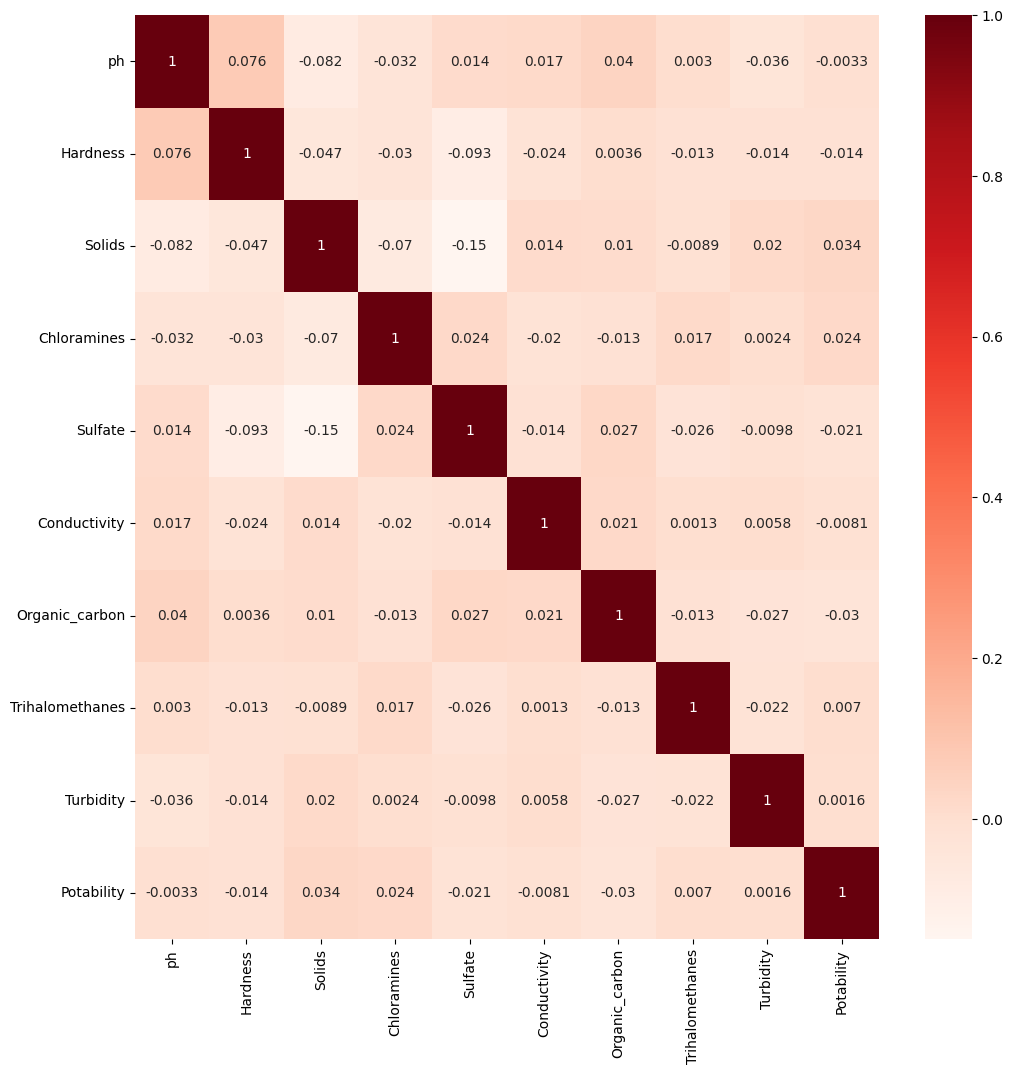

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# train,test set을 7:3으로 나눔
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.3)

In [ ]:
# feature importance로 입력변수 정하기
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    max_leaf_nodes = 16,
    max_features = 'auto',
    max_samples=0.5,
    bootstrap = True,
    n_jobs=-1
)

## feature selection 하기전 roc_auc 0.62

In [ ]:
from sklearn.metrics import roc_auc_score

rnd_clf = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba = rnd_clf.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba))

0.6956955074155748


In [ ]:
for name, score in zip(Xf.columns, rnd_clf.feature_importances_):
    print(name, score)

ph 0.13002003129966683
Hardness 0.12526405312987893
Solids 0.1177269228938381
Chloramines 0.11120735363860663
Sulfate 0.12097932687701206
Conductivity 0.0989782748831789
Organic_carbon 0.09995568366799305
Trihalomethanes 0.09717877771900305
Turbidity 0.09868957589082228


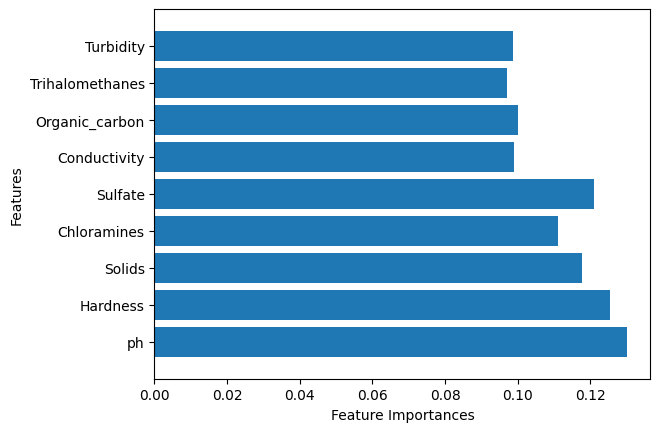

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xf_train.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(rnd_clf)

In [ ]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Turbidity'],axis=1)
Xf_test=Xf_test.drop(['Turbidity'],axis=1)

## 중요도가 낮은걸 저장한 결과 roc_auc가 조금 더 낮아짐 하지만 별로 차이가 없기때문에 drop -> 입력변수는 적을 수록 좋음

In [ ]:
rnd_clf1 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf1.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba1 = rnd_clf1.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba1))

0.6857331257837159


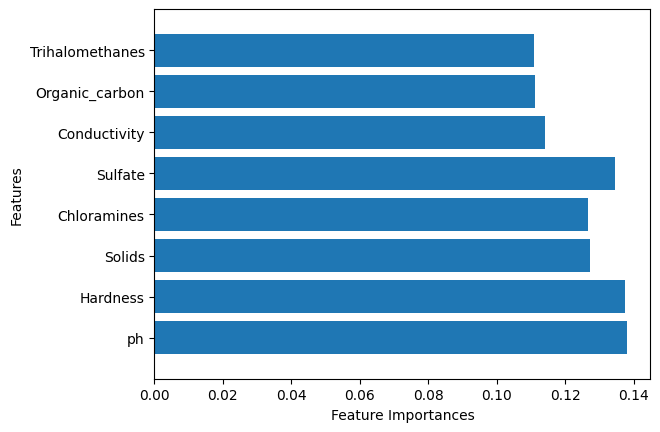

In [ ]:
plot_feature_importances(rnd_clf1)

In [ ]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Organic_carbon'],axis=1)
Xf_test=Xf_test.drop(['Organic_carbon'],axis=1)

In [ ]:
rnd_clf2 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf2.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba2 = rnd_clf2.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba2))

0.6930514117697929


## Organic_carbon한 결과 68%로 성능이 좋아졌다

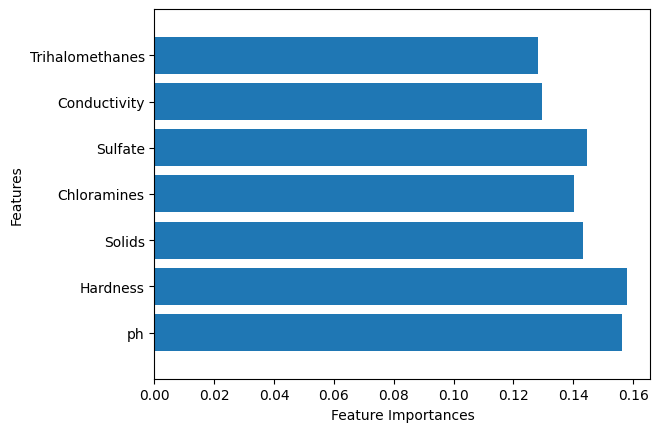

In [ ]:
plot_feature_importances(rnd_clf2)

In [ ]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Trihalomethanes'],axis=1)
Xf_test=Xf_test.drop(['Trihalomethanes'],axis=1)

In [ ]:
# 성능이 더 안좋아지기에 더이상 feature importnace론 입력변수 구하지 않음

rnd_clf3 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf3.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba3 = rnd_clf3.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba3))

0.6969148614173909


In [ ]:
Xf_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'], dtype='object')

## feature importance를 통해 입력변수 선정 - 6개
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

## vif로 입력변수 선정해보고자함

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame() # DF 생성
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

calc_vif(Xf_train)

,variables,VIF
0,ph,22.335432
1,Hardness,29.142637
2,Solids,6.654899
3,Chloramines,18.896876
4,Sulfate,48.372594
5,Conductivity,25.459897


In [ ]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Sulfate'],axis=1)
Xf_test=Xf_test.drop(['Sulfate'],axis=1)

In [ ]:
calc_vif(Xf_train)

,variables,VIF
0,ph,19.713875
1,Hardness,25.587070
2,Solids,6.590258
3,Chloramines,16.733106
4,Conductivity,22.337590


In [ ]:
rnd_clf4 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf4.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba4 = rnd_clf4.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba4))

0.5911250918839451


In [ ]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Hardness'],axis=1)
Xf_test=Xf_test.drop(['Hardness'],axis=1)

In [ ]:
calc_vif(Xf_train)

,variables,VIF
0,ph,16.593285
1,Solids,6.403860
2,Chloramines,15.105714
3,Conductivity,19.839452


In [ ]:
rnd_clf5 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf5.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba5 = rnd_clf5.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba5))

0.5675941540191117


In [ ]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Conductivity'],axis=1)
Xf_test=Xf_test.drop(['Conductivity'],axis=1)

In [ ]:
calc_vif(Xf_train)

,variables,VIF
0,ph,12.453073
1,Solids,5.872213
2,Chloramines,12.304838


In [ ]:
rnd_clf6 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf6.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba6 = rnd_clf6.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba6))

0.5670558221991612


# vif론 하면 독립변수를 구할 경우 roc_auc가 매우 안좋아짐으로 vif론 입력변수 정하지않고 feature importance로만 입력변수를 정함
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

In [ ]:
X = data.drop(['Potability','ph','Hardness','Solids','Chloramines','Sulfate','Conductivity'],axis=1)
y = data['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

------------전처리끝-------------------

In [ ]:
X_train

,Organic_carbon,Trihalomethanes,Turbidity
3033,8.582461,49.382684,4.763058
1147,14.365625,74.888422,3.499775
1666,15.706894,73.170198,4.246388
887,11.580141,66.396293,3.836703
3154,18.904399,85.799759,3.886882
...,...,...,...
618,9.762361,65.216338,4.008499
734,8.713964,58.413460,4.293727
2904,11.319488,78.898515,4.374333
329,14.252684,64.291292,4.268227


In [ ]:
X_test

,Organic_carbon,Trihalomethanes,Turbidity
134,20.098413,41.865960,4.201581
2320,16.357375,71.627136,4.466936
28,10.348951,53.008381,3.991564
2697,12.094513,74.718676,4.401413
555,17.307476,70.060303,5.776611
...,...,...,...
389,16.629384,66.396293,3.774256
85,7.507662,70.547387,3.612520
1154,13.978608,52.301550,3.894061
1314,10.667254,44.289013,4.442712


In [ ]:
y_train

3033    0
1147    1
1666    0
887     0
3154    1
       ..
618     0
734     1
2904    0
329     1
893     0
Name: Potability, Length: 2620, dtype: int64

In [ ]:
y_test

134     0
2320    1
28      0
2697    0
555     0
       ..
389     1
85      0
1154    1
1314    0
635     0
Name: Potability, Length: 656, dtype: int64

# Decision Tree Classfier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
DT = dc.fit(X_train,y_train)

In [ ]:
dc_pred = dc.predict(X_test)
dc_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

Accuracy score:  0.5457317073170732
-----------------------------------
Confusion Matrix:
 [[245 139]
 [159 113]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62       384
           1       0.45      0.42      0.43       272

    accuracy                           0.55       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.54      0.55      0.54       656



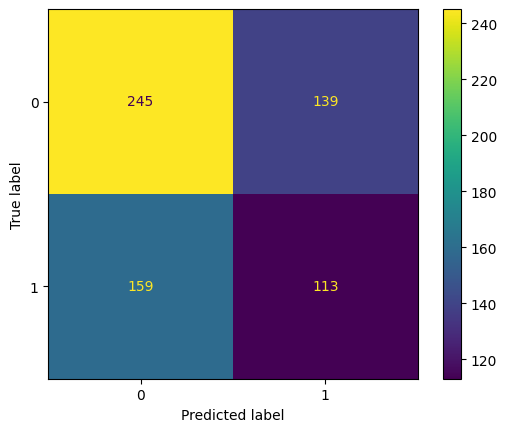

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(dc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(dc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(dc_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(dc_pred, y_test)
plt.show()

Interpreting the output of Decision Tree:


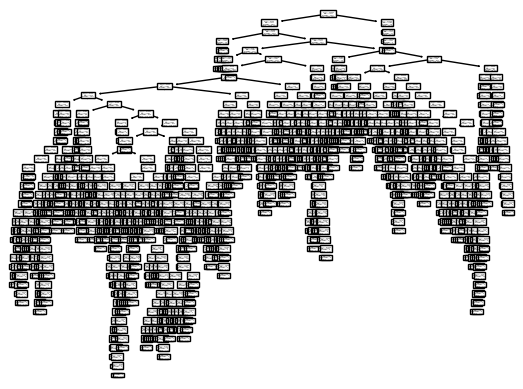

In [ ]:
from sklearn import tree

print('Interpreting the output of Decision Tree:')
tree.plot_tree(DT)
plt.show()

# Random Forest Classfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 250)
RF = rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.5701219512195121
-----------------------------------
Confusion Matrix:
 [[315 193]
 [ 89  59]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       508
           1       0.23      0.40      0.29       148

    accuracy                           0.57       656
   macro avg       0.51      0.51      0.49       656
weighted avg       0.66      0.57      0.60       656



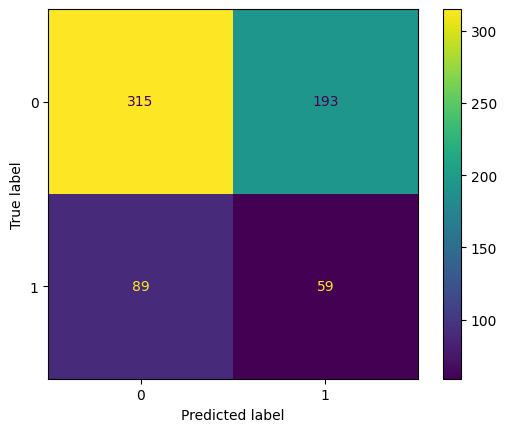

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(rf_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(rf_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(rf_pred, y_test)
plt.show()

Interpreting the output of Random Forest:


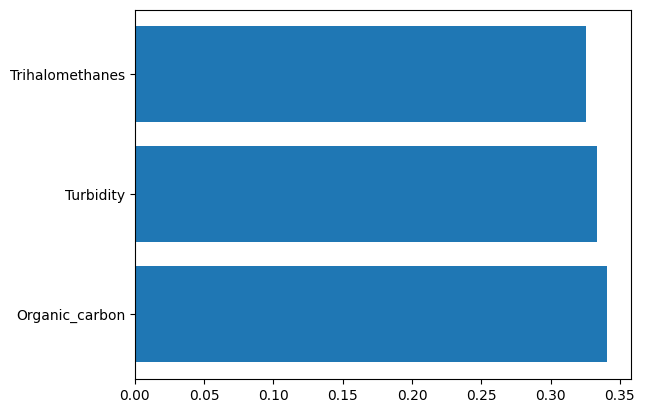

In [ ]:
print('Interpreting the output of Random Forest:')
rfi=pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

Accuracy

In [ ]:
print('Accuracy score of Decision Tree: ','-'*11, accuracy_score(dc_pred,y_test))
print('Accuracy score of Random Forest: ','-'*11, accuracy_score(rf_pred,y_test))

Accuracy score of Decision Tree:  ----------- 0.5457317073170732
Accuracy score of Random Forest:  ----------- 0.5625
